### Task 1: Predict the winner of the tournament 

In [1]:
import pandas as pd
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("team_data.csv", sep=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 66 columns):
Unnamed: 0                            68 non-null int64
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int6

In [3]:
#extract non zero columns 
df_new = df.loc[:, (df != 0).any(axis=0)]


In [4]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 59 columns):
Unnamed: 0                            68 non-null int64
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int6

In [5]:
#drop irrelevant column 
df_new.drop(columns="Unnamed: 0",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 58 columns):
total_points_scored_match_played      68 non-null int64
total_points_scored_rank              68 non-null int64
team_id                               68 non-null int64
team_name                             68 non-null object
total_points_scored                   68 non-null int64
total_points_conceded_match_played    68 non-null int64
total_points_conceded_rank            68 non-null int64
total_points_conceded                 68 non-null int64
avg_points_scored_match_played        68 non-null int64
avg_points_scored_rank                68 non-null int64
avg_points_scored                     68 non-null float64
successful_raids_match_played         68 non-null int64
successful_raids_rank                 68 non-null int64
successful_raids                      68 non-null int64
raid_points_match_played              68 non-null int64
raid_points_rank                      68 non-null int6

In [7]:
#verify if any column has all value 0
df_new.isnull().sum()

total_points_scored_match_played      0
total_points_scored_rank              0
team_id                               0
team_name                             0
total_points_scored                   0
total_points_conceded_match_played    0
total_points_conceded_rank            0
total_points_conceded                 0
avg_points_scored_match_played        0
avg_points_scored_rank                0
avg_points_scored                     0
successful_raids_match_played         0
successful_raids_rank                 0
successful_raids                      0
raid_points_match_played              0
raid_points_rank                      0
raid_points                           0
avg_raid_points_match_played          0
avg_raid_points_rank                  0
avg_raid_points                       0
successful_tackles_match_played       0
successful_tackles_rank               0
successful_tackles                    0
tackle_points_match_played            0
tackle_points_rank                    0


In [8]:
# converting boolean to numeric 
df_new["is_qualified"] = df_new["is_qualified"].astype(int)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df_new["is_qualified"]

0     1
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    0
18    1
19    0
20    0
21    0
22    0
23    0
24    1
25    1
26    1
27    1
28    1
29    1
     ..
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
Name: is_qualified, Length: 68, dtype: int64

In [10]:
#calulate perfomance rate for a team (points earned/match played)
col_t = df_new.columns[df_new.columns.str.endswith('_match_played')]

col_s = ['total_points_scored',
       'total_points_conceded', 'avg_points_scored',
       'successful_raids', 'raid_points',
       'avg_raid_points', 'successful_tackles',
       'tackle_points', 'avg_tackle_points',
       'super_raid', 'super_tackles',
       'do_or_die_raid_points', 'all_outs_inflicted',
       'all_outs_conceded']

point = "_p"

for i in range(len(col_t)):
    df_new[col_s[i]+point] = df_new[col_s[i]]/df_new[col_t[i]]


df_new.drop(col_s, axis=1, inplace=True)
df_new.drop(col_t, axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [11]:
df_new["win_rate"] = df_new["wins"]/df_new["played"]

In [12]:
df_new.drop(["wins", "played"], axis=1, inplace=True)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 43 columns):
total_points_scored_rank      68 non-null int64
team_id                       68 non-null int64
team_name                     68 non-null object
total_points_conceded_rank    68 non-null int64
avg_points_scored_rank        68 non-null int64
successful_raids_rank         68 non-null int64
raid_points_rank              68 non-null int64
avg_raid_points_rank          68 non-null int64
successful_tackles_rank       68 non-null int64
tackle_points_rank            68 non-null int64
avg_tackle_points_rank        68 non-null int64
super_raid_rank               68 non-null int64
super_tackles_rank            68 non-null int64
do_or_die_raid_points_rank    68 non-null int64
all_outs_inflicted_rank       68 non-null int64
all_outs_conceded_rank        68 non-null int64
season                        68 non-null int64
winner                        68 non-null int64
draws                         68

In [14]:
#extract test data for season 7
test_data = df_new[df_new['season']==7]

In [15]:
test_data.head()

,total_points_scored_rank,team_id,team_name,total_points_conceded_rank,avg_points_scored_rank,successful_raids_rank,raid_points_rank,avg_raid_points_rank,successful_tackles_rank,tackle_points_rank,...,avg_raid_points_p,successful_tackles_p,tackle_points_p,avg_tackle_points_p,super_raid_p,super_tackles_p,do_or_die_raid_points_p,all_outs_inflicted_p,all_outs_conceded_p,win_rate
0,1,4,Bengal Warriors,7,1,1,1,1,4,6,...,1.154444,9.222222,9.777778,0.543333,0.833333,0.666667,2.833333,1.611111,0.833333,0.611111
1,2,1,Bengaluru Bulls,4,3,2,2,2,9,5,...,1.111111,8.555556,9.888889,0.549444,0.388889,1.388889,1.944444,1.000000,1.222222,0.500000
2,2,6,Patna Pirates,3,5,4,3,5,6,3,...,1.052222,9.000000,10.277778,0.571111,0.666667,1.277778,3.722222,1.444444,1.222222,0.333333
3,4,2,Dabang Delhi K.C.,11,4,3,4,2,10,11,...,1.176471,8.764706,9.117647,0.536471,0.411765,0.411765,2.470588,1.588235,0.705882,0.764706
4,5,28,Haryana Steelers,6,2,5,5,4,5,6,...,1.162353,9.705882,10.352941,0.608824,0.705882,0.647059,3.529412,1.470588,1.117647,0.647059


In [16]:
test_data.shape

(12, 43)

In [17]:
#extra rest training data for rest of seasons
train_data  = df_new[df_new['season']!=7]

In [18]:
train_data.shape

(56, 43)

In [19]:
train_x = train_data.drop(columns=["winner","team_id","team_name","team_short_name"], axis=1)

In [20]:
train_y = train_data["winner"]


In [21]:
train_id = train_data['team_id']

In [22]:
train_team_name = train_data['team_name']

In [23]:
train_x = train_x.loc[:, ~train_x.columns.str.endswith('match_played')]
#print (train_x)
 

In [24]:
train_x = train_x.loc[:, ~train_x.columns.str.endswith('rank')]
#print (train_x)

In [25]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 12 to 67
Data columns (total 25 columns):
season                     56 non-null int64
draws                      56 non-null int64
is_qualified               56 non-null int64
lost                       56 non-null int64
points                     56 non-null int64
points_conceded            56 non-null int64
points_scored              56 non-null int64
position                   56 non-null int64
score_diff                 56 non-null int64
tied                       56 non-null int64
total_points_scored_p      56 non-null float64
total_points_conceded_p    56 non-null float64
avg_points_scored_p        56 non-null float64
successful_raids_p         56 non-null float64
raid_points_p              56 non-null float64
avg_raid_points_p          56 non-null float64
successful_tackles_p       56 non-null float64
tackle_points_p            56 non-null float64
avg_tackle_points_p        56 non-null float64
super_raid_p           

### Identify Important features

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [27]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(train_x, train_y)

In [28]:
rfe.support_

array([ True,  True, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False])

In [29]:
list(zip(train_x.columns, rfe.support_, rfe.ranking_))

[('season', True, 1),
 ('draws', True, 1),
 ('is_qualified', False, 6),
 ('lost', False, 5),
 ('points', False, 11),
 ('points_conceded', False, 10),
 ('points_scored', False, 9),
 ('position', True, 1),
 ('score_diff', False, 7),
 ('tied', True, 1),
 ('total_points_scored_p', True, 1),
 ('total_points_conceded_p', True, 1),
 ('avg_points_scored_p', True, 1),
 ('successful_raids_p', True, 1),
 ('raid_points_p', True, 1),
 ('avg_raid_points_p', True, 1),
 ('successful_tackles_p', True, 1),
 ('tackle_points_p', False, 3),
 ('avg_tackle_points_p', False, 8),
 ('super_raid_p', True, 1),
 ('super_tackles_p', True, 1),
 ('do_or_die_raid_points_p', True, 1),
 ('all_outs_inflicted_p', True, 1),
 ('all_outs_conceded_p', False, 2),
 ('win_rate', False, 4)]

In [30]:
col = train_x.columns[rfe.support_]
print(col)

Index(['season', 'draws', 'position', 'tied', 'total_points_scored_p',
       'total_points_conceded_p', 'avg_points_scored_p', 'successful_raids_p',
       'raid_points_p', 'avg_raid_points_p', 'successful_tackles_p',
       'super_raid_p', 'super_tackles_p', 'do_or_die_raid_points_p',
       'all_outs_inflicted_p'],
      dtype='object')


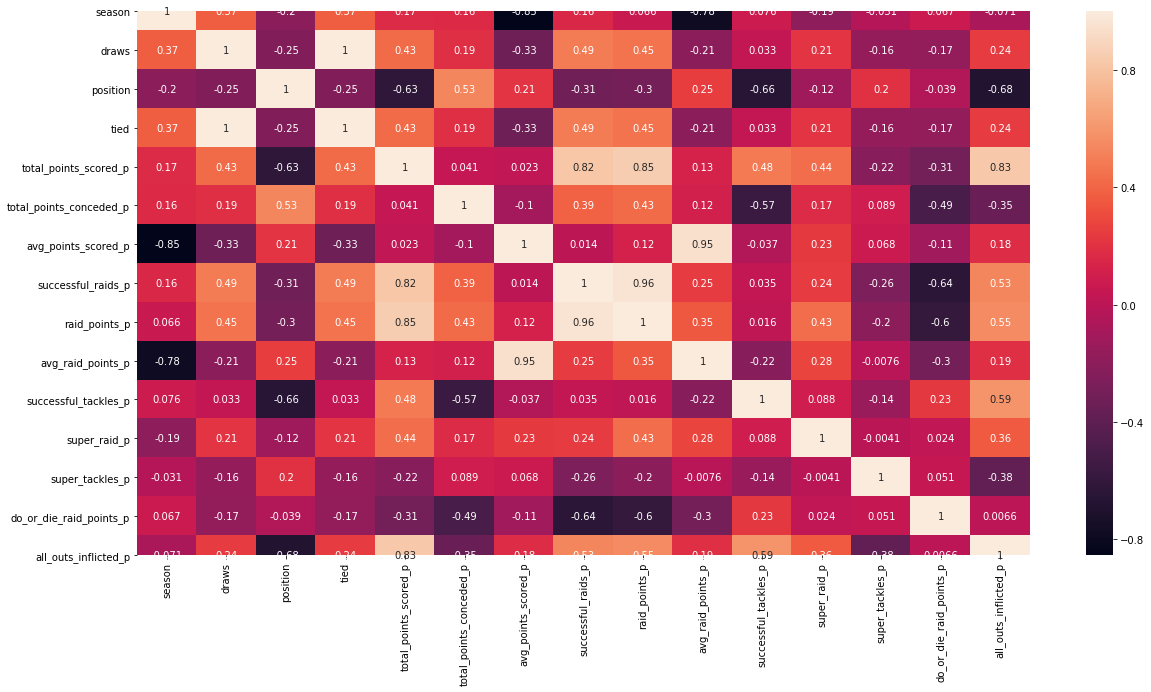

In [31]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_x[col].corr(),annot = True)
plt.show()

In [70]:
#Highly coorelated columns are removed

col = ['is_qualified', "position",    
     'super_raid_p', 'super_tackles_p',       
        'win_rate']

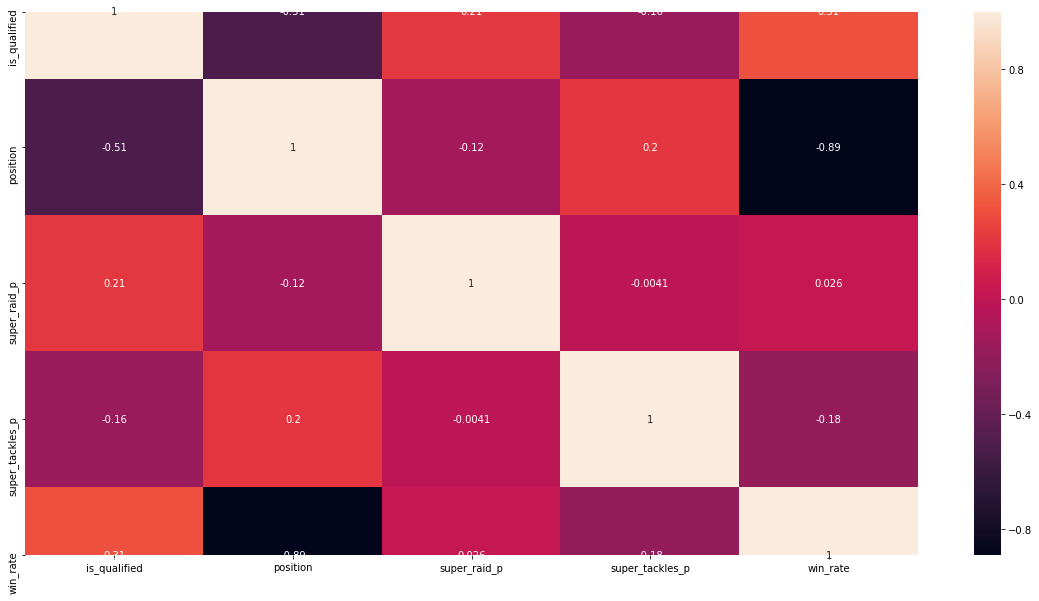

In [71]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train_x[col].corr(),annot = True)
plt.show()

### Scaling Data 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

X = train_x[col]

Y = train_y

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3)




In [73]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [74]:
X_test_pred = sc.transform(test_data[col])

In [75]:
#check the VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,super_tackles_p,8.33
2,super_raid_p,6.78
4,win_rate,5.51
1,position,5.39
0,is_qualified,1.64


## Module Building 

#### 1. Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier

#regressor = RandomForestRegressor(n_estimators=100, random_state=3)

regressor = RandomForestClassifier(bootstrap=True,                                                         
                              class_weight="balanced")
regressor.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)



In [77]:
y_test_pred_final = pd.DataFrame({'winner':y_test, 'winner_Prob':y_test_pred})
#y_train_pred_final['team_id'] = train_id.values
#y_train_pred_final['team_name'] = train_team_name.values
y_test_pred_final.head()

,winner,winner_Prob
24,1,0
46,0,1
21,0,0
65,0,0
58,0,0


In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [103]:
from sklearn import metrics

auc_score = metrics.roc_auc_score( y_test_pred_final.winner, y_test_pred_final.winner_Prob )
print(auc_score)

0.46875


In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

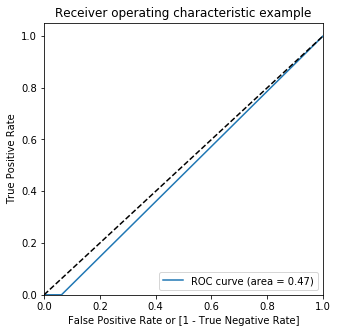

In [82]:
draw_roc(y_test_pred_final.winner, y_test_pred_final.winner_Prob)

In [83]:
y_team_pred = regressor.predict_proba(X_test_pred)

In [84]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_team_pred[:,1]})

In [85]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.1
1,Bengaluru Bulls,0.0
2,Patna Pirates,0.0
3,Dabang Delhi K.C.,0.5
4,Haryana Steelers,0.1
5,Puneri Paltan,0.0
6,Jaipur Pink Panthers,0.2
7,U Mumba,0.0
8,Tamil Thalaivas,0.0
9,Gujarat Fortunegiants,0.0


### 2. Logistic Regression

In [86]:
import numpy as np
from sklearn.linear_model import LogisticRegression


est = LogisticRegression(random_state=0, class_weight='balanced')

est.fit(X_train, y_train)

y_pred = est.predict(X_test)

y_pred_prob = est.predict_proba(X_test)




In [87]:
print ("aoc_auc_score:",roc_auc_score(y_test, y_pred))

aoc_auc_score: 0.90625


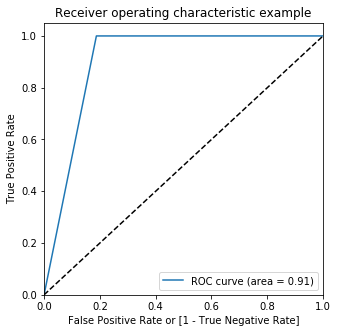

In [88]:
draw_roc(y_test, y_pred)

In [89]:
y_test_pred = est.predict(X_test_pred)

In [90]:
y_test_pred_prob = est.predict_proba(X_test_pred)

In [91]:
y_test_pred_prob[:,1]

array([5.91780199e-01, 1.24379749e-01, 7.72504665e-03, 6.63571089e-01,
       6.44618730e-01, 6.55746461e-03, 2.37319617e-02, 2.20126464e-01,
       1.18324154e-04, 8.35568525e-04, 4.33220841e-02, 5.66882377e-04])

In [92]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_test_pred_prob[:,1]})

In [93]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.591780
1,Bengaluru Bulls,0.124380
2,Patna Pirates,0.007725
3,Dabang Delhi K.C.,0.663571
4,Haryana Steelers,0.644619
5,Puneri Paltan,0.006557
6,Jaipur Pink Panthers,0.023732
7,U Mumba,0.220126
8,Tamil Thalaivas,0.000118
9,Gujarat Fortunegiants,0.000836


### 3. XGBoost

In [94]:
from numpy import loadtxt
from xgboost import XGBClassifier


In [95]:
model = XGBClassifier(scale_pos_weight=7)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=7, seed=None, silent=None,
       subsample=1, verbosity=1)

In [96]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [97]:
print (roc_auc_score(y_test, y_pred))

0.4375


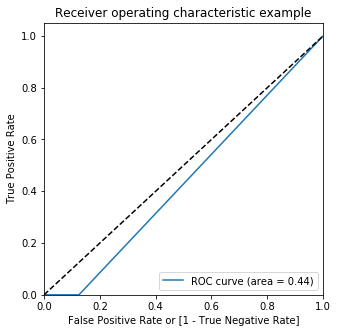

In [98]:
draw_roc(y_test,y_pred)

In [99]:
y_pred = model.predict_proba(X_test_pred)

In [100]:
y_test_final = pd.DataFrame({"team_name":test_data.team_name, 'winner_prob':y_pred[:,1]})

In [101]:
y_test_final

,team_name,winner_prob
0,Bengal Warriors,0.605589
1,Bengaluru Bulls,0.007084
2,Patna Pirates,0.012155
3,Dabang Delhi K.C.,0.769102
4,Haryana Steelers,0.054124
5,Puneri Paltan,0.007084
6,Jaipur Pink Panthers,0.007084
7,U Mumba,0.006442
8,Tamil Thalaivas,0.004567
9,Gujarat Fortunegiants,0.005932


   Model                  ROC score 
1. Random Forest            46 %
2. Logistic Regression      90%
3. XGBoost                  43%


Logistic Regression has higher accuracy rate.

****Task 1: Predicting the winner of the tournament : Dabang Delhi K.C.***